## Donchain Channel

Donchian Channel은 리처드 돈치안(Richard Donchian)에 의해 개발된 기술적 분석 도구로, 시장의 최고가와 최저가를 기반으로 한 지표다. 이 채널은 주로 가격 변동의 폭을 측정하고, 추세와 가격의 지지 및 저항 수준을 식별하는 데 사용된다.

### Donchian Channel의 구성 요소
- 상단 밴드 (Upper Band): 일정 기간 동안의 최고가로 설정된다.
- 하단 밴드 (Lower Band): 같은 기간 동안의 최저가로 설정된다.
- 중앙선 (Middle Line): 상단 밴드와 하단 밴드의 평균값이며, 선택적으로 사용될 수 있다.

**Donchian Channel**은 특정 기간(예를 들어 20일) 동안의 최고가와 최저가를 사용하여 두 개의 밴드를 형성한다. 이 기간은 사용자가 설정할 수 있으며, 기간에 따라 채널의 민감도가 달라진다. 주가가 상단 밴드를 넘어설 경우, 시장은 강세로 간주되고 구매 신호로 해석될 수 있다. 반대로 주가가 하단 밴드 아래로 떨어질 경우, 약세로 간주되며 판매 신호로 해석될 수 있다. 

**Donchian Channel**은 또한 '브레이크아웃' 거래 전략에 자주 사용된다. 가격이 상단 또는 하단 밴드를 넘어서는 것을 브레이크아웃으로 간주하며, 이는 새로운 추세의 시작을 나타낼 수 있다. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from ta.volatility import donchian_channel_hband,donchian_channel_lband,donchian_channel_mband,donchian_channel_pband,donchian_channel_wband
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

start_date = '2023-01-01'
end_date = '2024-04-14'
ticker = '^GSPC'
data = yf.download(ticker, start = start_date, end = end_date)

[*********************100%%**********************]  1 of 1 completed


### Band
upper band, lower band를 생성한다

In [2]:
hband = donchian_channel_hband(
    high = data['High'],
    low = data['Low'],
    close = data['Close'],
    window = 20,
    offset = 0,
    fillna = False
)

lband = donchian_channel_lband(
    high = data['High'],
    low = data['Low'],
    close = data['Close'],
    window = 20,
    offset = 0,
    fillna = False
)

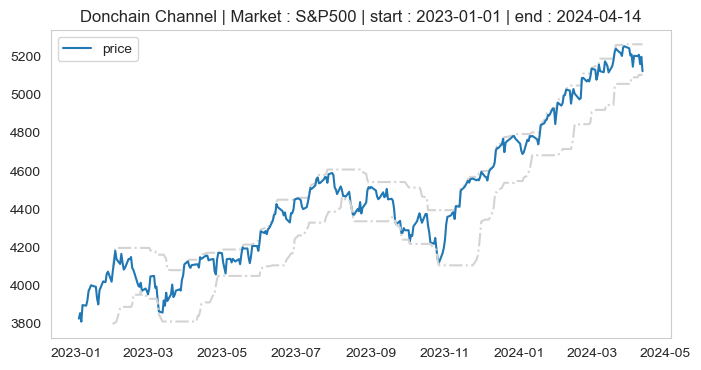

In [3]:
plt.figure(figsize = (8, 4))
plt.plot(hband, color = 'lightgray', ls = '-.')
plt.plot(data['Close'], label = 'price')
plt.plot(lband, color = 'lightgray', ls = '-.')
plt.legend()
plt.grid(False)
plt.title(f'Donchain Channel | Market : S&P500 | start : {start_date} | end : {end_date}')
plt.show()

mband는 중앙선이다. 보조적으로 사용된다

In [4]:
mband = donchian_channel_mband(
    high = data['High'],
    low = data['Low'],
    close = data['Close'],
    window = 20,
    offset = 0,
    fillna = False
)

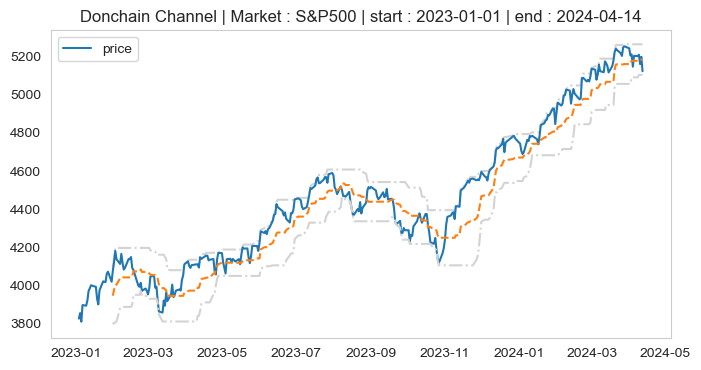

In [6]:
plt.figure(figsize = (8, 4))
plt.plot(hband, color = 'lightgray', ls = '-.')
plt.plot(data['Close'], label = 'price')
plt.plot(mband, ls = '--')
plt.plot(lband, color = 'lightgray', ls = '-.')

plt.legend()
plt.grid(False)
plt.title(f'Donchain Channel | Market : S&P500 | start : {start_date} | end : {end_date}')
plt.show()

In [7]:
pband = donchian_channel_pband(
    high = data['High'],
    low = data['Low'],
    close = data['Close'],
    window = 20,
    offset = 0,
    fillna = False
)

wband = donchian_channel_wband(
    high = data['High'],
    low = data['Low'],
    close = data['Close'],
    window = 20,
    offset = 0,
    fillna = False
)

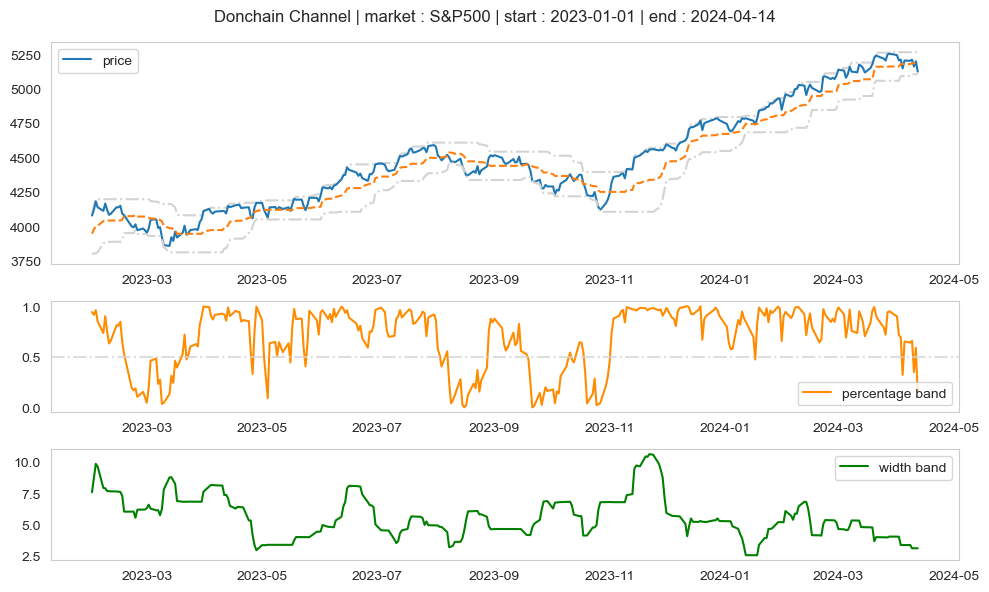

In [9]:
import matplotlib.gridspec as gridspec

plt.figure(figsize = (10, 6))
plt.subplot(3, 1, 1)
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1]) 

plt.subplot(gs[0])
plt.plot(hband, color = 'lightgray', ls = '-.')
plt.plot(data['Close'][19:], label = 'price')
plt.plot(mband, ls = '--')
plt.plot(lband, color = 'lightgray', ls = '-.')
plt.legend()
plt.grid(False)

plt.subplot(gs[1])
plt.plot(pband, color = 'darkorange')
plt.grid(False)
plt.axhline(y = 0.5, color = 'lightgray', linestyle = '-.', alpha = 0.75)
plt.legend(['percentage band'])

plt.subplot(gs[2])
plt.plot(wband, color = 'green')
plt.grid(False)
plt.legend(['width band'])

plt.suptitle(f'Donchain Channel | market : S&P500 | start : {start_date} | end : {end_date}')
plt.tight_layout()
plt.show()